## Production of the logarithmic plot $v_a(\eta)$ to determine the critical exponent $\beta$

Produces a the plot of the paper with $v_a$ as a function of $[(\eta_c(L)$-$\eta)/\eta_c(L)]$ via linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import VicsekSimulationNumba as vi
import matplotlib
from pylab import *
from scipy import optimize, stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator)

In [3]:
data = pd.read_csv("Data/vaOfEta40calculatedRho4.0WithErrors.csv")
x = np.array(data)[:,2]
y = np.array(data)[:,1]
error = np.array(data)[:,3]
data2 = pd.read_csv("Data/vaOfEta100calculatedRho4.0WithErrors.csv")
x2 = np.array(data2)[:,2]
y2 = np.array(data2)[:,1]
error2 = np.array(data2)[:,3]
data3 = pd.read_csv("Data/vaOfEta400calculatedRho4.0WithErrors.csv")
x3 = np.array(data3)[:,2]
y3 = np.array(data3)[:,1]
error3 = np.array(data3)[:,3]

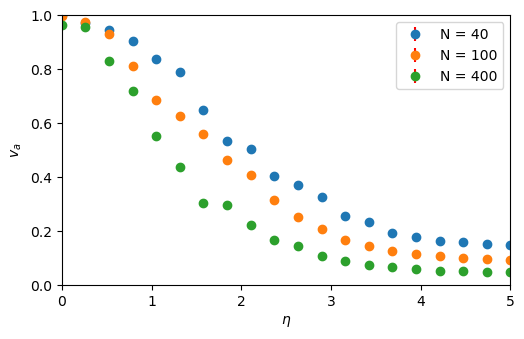

In [4]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=3.5)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([0,5])
ax1.set_ylim([0,1])

#ax1.grid( which="both")

#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_major_locator(AutoLocator())

#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=7)
#ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")



ax1.set_xlabel('$\eta$')
ax1.set_ylabel('$v_a$')

plt.errorbar(x, y, yerr = error, label = 'N = 40', ecolor = 'red', fmt = 'o')
plt.errorbar(x2, y2, yerr = error2, label = 'N = 100', ecolor = 'red', fmt = 'o')
plt.errorbar(x3, y3, yerr = error3, label = 'N = 400', ecolor = 'red', fmt = 'o')

plt.legend()

In [5]:
result = stats.linregress(x[2:15],y[2:15])
result2 = stats.linregress(x2[2:13],y2[2:13])
result3 = stats.linregress(x3[2:10],y3[2:10])

In [6]:
result3

LinregressResult(slope=-0.36308401523351885, intercept=0.965617509588392, rvalue=-0.9745940953291271, pvalue=4.02190469102151e-05, stderr=0.03406543802250501, intercept_stderr=0.053412703134197825)

In [7]:
intercept_stderr=0.029012354760058815
intercept_stderr2=0.02510877031314901
intercept_stderr3=0.05341270313419759


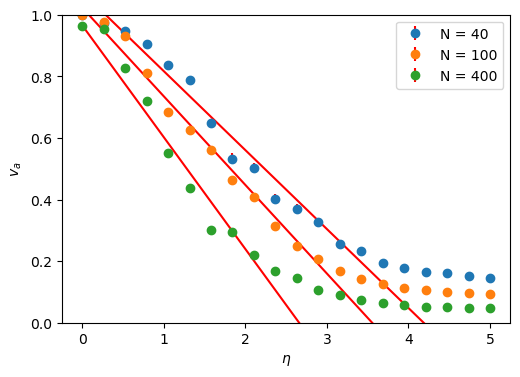

In [8]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=4)
ax1 = fig.add_subplot(1,1,1)

#ax1.grid( which="both")

#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_major_locator(AutoLocator())

#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=7)
#ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")

liny = result[0]*x + result[1]
liny2 = result2[0]*x2 + result2[1]
liny3 = result3[0]*x3 + result3[1]

ax1.set_xlabel('$\eta$')
ax1.set_ylabel('$v_a$')

ax1.set_ylim([0,1])

plt.plot(x,liny, c = 'red')
plt.plot(x2,liny2, c = 'red')
plt.plot(x3,liny3, c = 'red')

plt.errorbar(x, y, yerr = error, label = 'N = 40', ecolor = 'red', fmt = 'o')
plt.errorbar(x2, y2, yerr = error2, label = 'N = 100', ecolor = 'red', fmt = 'o')
plt.errorbar(x3, y3, yerr = error3, label = 'N = 400', ecolor = 'red', fmt = 'o')
plt.legend()

plt.savefig('DeterCritNoise.pgf')

In [9]:
cEta = result[1]/result[0] * -1
cEta2 = result2[1]/result2[0] * -1
cEta3 = result3[1]/result3[0] * -1

cerr1 = cEta* np.sqrt((result[4]/result[0])**2+(intercept_stderr/result[1])**2)
cerr2 = cEta2* np.sqrt((result2[4]/result2[0])**2+(intercept_stderr2/result2[1])**2)
cerr3 = cEta3* np.sqrt((result3[4]/result3[0])**2+(intercept_stderr3/result3[1])**2)


In [10]:
eta = (cEta-x)/cEta
eta2 = (cEta2-x2)/cEta2
eta3 = (cEta3-x3)/cEta3

etaErr1 = np.abs(eta * np.sqrt((cerr1/cEta)**2+(cerr1/(cEta-x))**2))
etaErr2 = np.abs(eta2 * np.sqrt((cerr2/cEta2)**2+(cerr2/(cEta2-x2))**2))
etaErr3 = np.abs(eta3 * np.sqrt((cerr3/cEta3)**2+(cerr3/(cEta3-x3))**2))

In [11]:
np.array([[cEta,cEta2,cEta3],[cerr1,cerr2,cerr3]])

array([[4.18629626, 3.55499494, 2.6594878 ],
       [0.23313902, 0.17652593, 0.28965663]])

In [12]:
eta3

array([ 1.        ,  0.90104941,  0.80209881,  0.70314822,  0.60419763,
        0.50524704,  0.40629644,  0.30734585,  0.20839526,  0.10944466,
        0.01049407, -0.08845652, -0.18740711, -0.28635771, -0.3853083 ,
       -0.48425889, -0.58320949, -0.68216008, -0.78111067, -0.88006126])

In [13]:
lin = stats.linregress(np.log(np.append(eta[:13],np.append(eta2[:10],eta3[:6]))),np.log(np.append(y[:13],np.append(y2[:10],y3[:6]))))
lin

LinregressResult(slope=1.052429069839243, intercept=0.0376932144711557, rvalue=0.9887907395643997, pvalue=7.709643103351938e-24, stderr=0.030583669185215295, intercept_stderr=0.018484502794509035)

In [31]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [33]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=4)
ax1 = fig.add_subplot(1,1,1)

#ax1.grid( which="both")

#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_major_locator(AutoLocator())

#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=7)
#ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")

ax1.set_xscale('log')
ax1.set_yscale('log')


#ax1.set_xlim([0.01,1])
ax1.set_xticks([0.03,0.1,0.3, 1, 3])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_yticks([0.1, 1])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_xlabel('$[(\eta_c(L)$-$\eta)/\eta_c(L)]$')
ax1.set_ylabel('$v_a$')



yfit = lin[0]*np.log(eta[:15])+lin[1]
plt.plot(eta[:15],np.exp(yfit), c = 'red')
plt.errorbar(eta[:16],y[:16], label = 'N = 40', fmt = 'o', yerr = error[:16], ecolor = 'grey')
plt.errorbar(eta2[:14],y2[:14], label = 'N = 100', fmt = 'o', yerr = error2[:14], ecolor = 'grey')
plt.errorbar(eta3[:10],y3[:10], label = 'N = 400', fmt = 'o', yerr = error3[:10], ecolor = 'grey')
#plt.scatter(eta[:16],y[:16], label = 'N = 40')
#plt.scatter(eta2[:14],y2[:14], label = 'N = 100')
#plt.scatter(eta3[:10],y3[:10], label = 'N = 400')

plt.legend()

plt.savefig('vaOfEtaCalcLn.pgf')

In [16]:
etaErr1/eta

array([ 0.07875897,  0.08144333,  0.08461157,  0.0883865 ,  0.0929332 ,
        0.0984783 ,  0.10534102,  0.11398497,  0.12510917,  0.13981795,
        0.1599633 ,  0.18890539,  0.23344068,  0.30970812,  0.4676688 ,
        0.97735964, -9.62205648, -0.81314386, -0.42711517, -0.2918781 ])

In [19]:
etaErr2/eta2

array([ 0.07022383,  0.07308469,  0.07656899,  0.0808708 ,  0.08626763,
        0.09316931,  0.10220591,  0.11439632,  0.13150018,  0.15683762,
        0.19751002,  0.27193108,  0.44730221,  1.31886016, -1.36703709,
       -0.45262462, -0.27382669, -0.19846215, -0.15740211, -0.13186908])